# Статистика, DS-поток
## Задание SP.5

Задача 1: Визуализация bias-variance разложения для оценок параметров.
▫️ Пункт a): наличие решения. (40.0)
▫️ Пункт b): наличие решения. (40.0)
▫️ Плохой масштаб графиков. Комм. Из-за этого кажется, что оценки примерно равны, на самом деле, это не так. Инд. комм. Стоило выбрать другой масштаб по оси y (-10.0)
▫️ Неправильные константы для оценки. Комм. На самом деле, во 2 пункте ОМП допускается при c = n, а минимизируящая MSE - при c = n + 1. (-10.0)
▫️ Арифметическая ошибка в пункте b. (-5.0)
Баллы: 55.0 / 80.0

Задача 2: Сравнение оценок по функциям риска.
▫️ Наличие решения. (50.0)
▫️ Не хватает комментариев по ходу решения. Комм. Хотелось бы разбавления кода текстом с описанием того, что происходит. Можно ориентироваться на ноутбуки с лекций и семинаров для того, чтобы понять, к чему ориентироваться. (-5.0)
Баллы: 45.0 / 50.0

Задача 3: Сравнение оценок в схеме Бернулли (среднее, Ходжеса-Лемана).
▫️ Пункт 1): наличие решения. (35.0)
▫️ Пункт 2): наличие решения. (35.0)
▫️ Пункт 3): наличие решения. (35.0)
▫️ Пункт 4): наличие решения. (35.0)
▫️ Плохой график в 4-ом пункте. Комм. В четвертом пункте стоило нарисовать подробный график и для более малых $n$. Там, например, видно чередование для четных и нечетных $n$. При малых n видна зубчатость графика, объясняемая разной четностью n. (-10.0)
▫️ Нет сравнения 2 и 3 пункта. Комм. Должны были получить похожие результаты во 2 и 3 пунктах и заметить, что мы считаем по факту одно и то же: во второрм пункте - сэмлпируя, а в 3 - теоретически. (-10.0)
Баллы: 120.0 / 150.0

Сумма: 220 / 280.0

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

In [8]:
sps.expon(scale=1).cdf(0.95)-1

-0.38674102345450123

-----

## Задача 1.
Пусть $\widehat{\theta}$ &mdash; оценка параметра $\theta$ и $\textrm{MSE}_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \left(\widehat{\theta} - \theta\right)^2$ &mdash; среднеквадратичная ошибка оценки $\widehat{\theta}$. Тогда справедливо bias-variance разложение:
$$\textrm{MSE}_{\widehat{\theta}} (\theta) = \textrm{bias}_{\widehat{\theta}}^2(\theta) + \textrm{var}_{\widehat{\theta}} (\theta)$$
$$\textrm{bias}_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \widehat{\theta} - \theta; $$
$$\textrm{var}_{\widehat{\theta}} (\theta) = \mathsf{D}_{\theta} \widehat{\theta}.$$

*a).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathcal{K} = \left\{c_n X_{(n)}, c_n\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** 
$\text{bias}_{\hat\theta}^2=\theta^2(c\frac{n}{n+1}-1)^2$, $\text{var}_{\hat\theta}=\theta^2\frac{c^2n}{(n+1)^2(n+2)}$

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отображена информативная часть графика (по оси *x* примерно от `0.9` до `1.4`). Не забудьте добавить сетку и легенду, а также подписать оси.

На графике проведите вертикальные линии с координатами $c$, соответствующими минимуму функции риска, несмещенной оценке и ОМП.

Сделайте выводы. Какое значение $c_n$ дает минимум функции риска? Каково поведение компонент разложения? Как соотносятся полученные оценки?

**Решение:**

Несмещенная оценка: $\frac{n+1}{n}X_{(n)}$, минимум риска: $\frac{n+2}{n+1}X_{(n)}$, ОМП: $X_{(n)}$

In [10]:
n = 5
theta = 1
c = np.linspace(0.5, 1.5)

bias2 = theta ** 2 * (c * n / (n+1) - 1) ** 2
var = theta ** 2 * (c ** 2 * n / (n+1) ** 2 / (n+2))

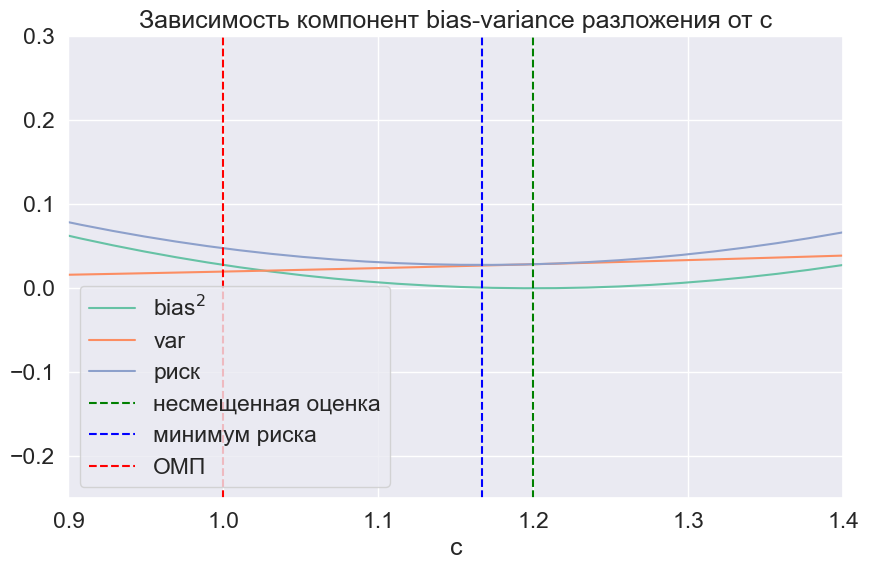

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(c, bias2, label='bias$^2$')
plt.plot(c, var, label='var')
plt.plot(c, bias2 + var, label='риск')
plt.axvline(x=(n+1)/n, label='несмещенная оценка', linestyle='--', color='green')
plt.axvline(x=(n+2)/(n+1), label='минимум риска', linestyle='--', color='blue')
plt.axvline(x=1, label='ОМП', linestyle='--', color='red')
plt.xlabel('c')
plt.title('Зависимость компонент bias-variance разложения от с')
plt.xlim(0.9, 1.4)
plt.ylim(-0.25, 0.3)
plt.legend()
plt.show()

**Вывод:** 
Минимум функции риска лежит между ОМП и несмещенной оценкой, ближе к несмещенной оценке, потому что функция риска это сумма смещения и дисперсии. Видим, что дисперсия растет монотонно по с, а смещение сначала убывает, достигает минимума в с=1.2 и затем возрастает.

*b).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, где $a$ и $\sigma$ неизвестны. Для величины $\sigma^2$ рассмотрим класс оценок $\mathcal{K} = \left\{\frac{1}{c_n}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, \; c_n \in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** $\text{bias}_{\hat\theta}^2=\theta^2(1 - \frac{n-c}{c})^2$, $\text{var}_{\hat\theta}=\theta^2\frac{2n^2}{c^2}$

Повторите исследование, аналогичное пункту *a)* для $a = 0, \sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика рядом с помощью функции `plt.subplot`. Не забудьте сделать выводы.

**Решение:**

Несмещенная оценка: $\frac{1}{n-1}S^2$

Минимум риска: $\frac{n-1}{2n^2+(n-1)^2}S^2$

ОМП: $\frac{1}{n}S^2$


In [12]:
n = 5
theta = 1
n = np.array([5, 10]).reshape(-1, 1)
c = np.linspace(0.001, 50, 10000)

bias2 = theta ** 2 * (1 - (n - 1) / c) ** 2
var = 2 * theta ** 2 * (n ** 2 / c ** 2)

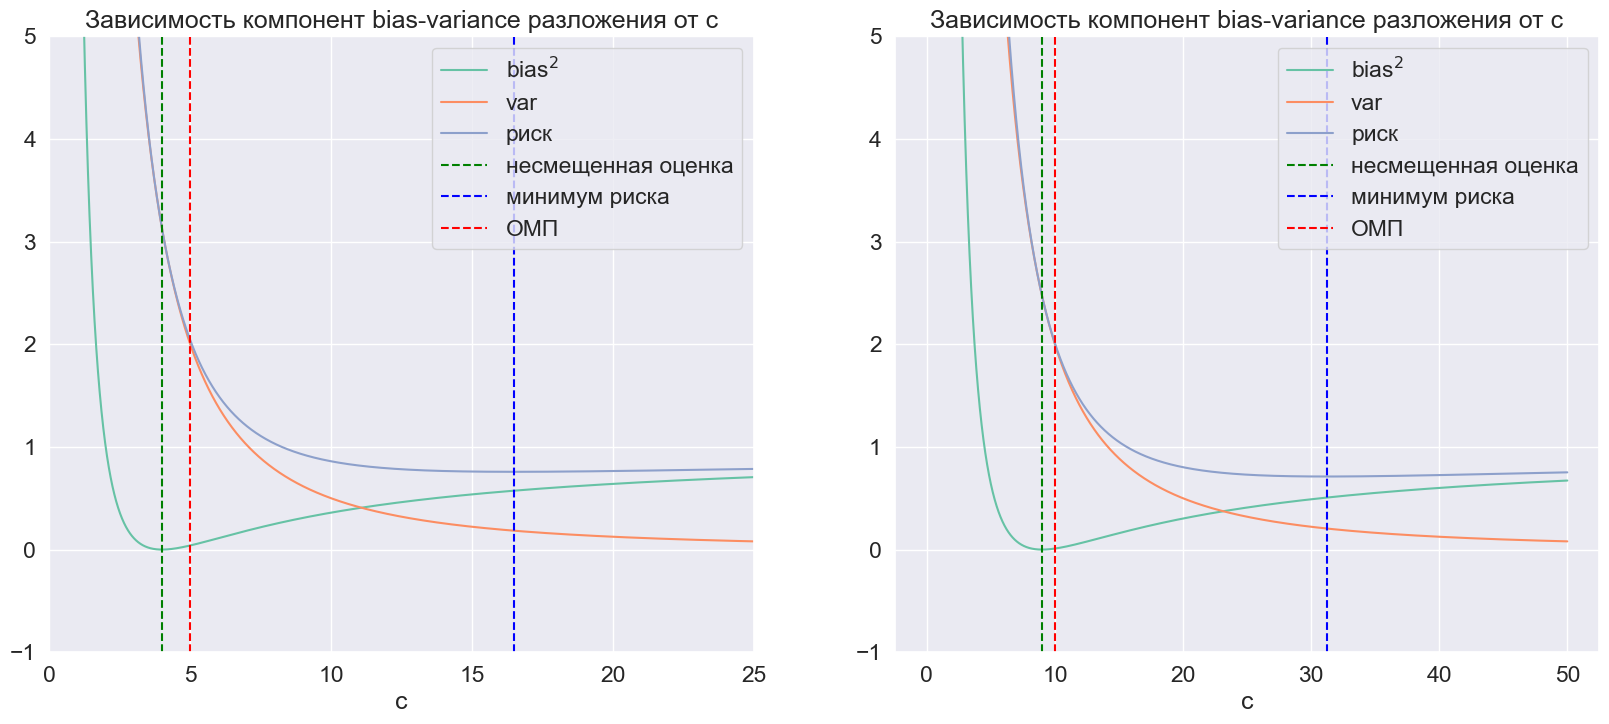

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax[0].plot(c, bias2[0], label='bias$^2$')
ax[0].plot(c, var[0], label='var')
ax[0].plot(c, bias2[0] + var[0], label='риск')
ax[0].axvline(x=n[0]-1, label='несмещенная оценка', linestyle='--', color='green')
ax[0].axvline(x=(2*n[0]**2+(n[0]-1)**2)/(n[0]-1), label='минимум риска', linestyle='--', color='blue')
ax[0].axvline(x=n[0], label='ОМП', linestyle='--', color='red')
ax[0].set_xlabel('c')
ax[0].set_title('Зависимость компонент bias-variance разложения от с')
ax[0].set_xlim(0, 20)
ax[0].set_ylim(-1, 5)
ax[0].legend()

ax[1].plot(c, bias2[1], label='bias$^2$')
ax[1].plot(c, var[1], label='var')
ax[1].plot(c, bias2[1] + var[1], label='риск')
ax[1].axvline(x=n[1]-1, label='несмещенная оценка', linestyle='--', color='green')
ax[1].axvline(x=(2*n[1]**2+(n[1]-1)**2)/(n[1]-1), label='минимум риска', linestyle='--', color='blue')
ax[1].axvline(x=n[1], label='ОМП', linestyle='--', color='red')
ax[1].set_xlabel('c')
ax[1].set_title('Зависимость компонент bias-variance разложения от с')
ax[0].set_xlim(0, 25)
ax[1].set_ylim(-1, 5)
ax[1].legend()

plt.show()

**Вывод:** 
Около несмещенной оценки, то есть, когда bias достигает минимума, функция риска повторяет график дисперсии. Поэтому минимум фунцкии риска получаем чуть-чуть увеличив bias, но сильно уменьшив дисперсию. Заметим, что функция риска практически не меняет свое значение при c>13, это объясняется тем, что увеличение bias компенсируется уменьшением дисперсии.

Сделайте вывод по результатам пунктов *a)*, *b)*.

**Общий вывод:** 
Еще раз отметим, что функция риска это сумма смещения и дисперсии. Минимум функции всегда смещен, так как дисперсия убывает сильнее, чем возрастает bias.




---
## Задача 2.
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ — одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

В задаче доспустимо использовать короткие циклы, то есть с малым количествои итераций.

**Решение:**

In [17]:
n = 100
theta = np.linspace(0.01, 2, 200)
sample = sps.uniform(0, theta).rvs(size=(5000, n, 200)).T

In [18]:
theta_mean = 2 * sample.mean(axis=1)
theta_min = (n + 1) * sample.min(axis=1)
theta_minmax = sample.min(axis=1) + sample.max(axis=1)
theta_max = (n + 1) / n * sample.max(axis=1)

theta = theta.reshape(-1, 1)
risk1_mean = np.abs(theta_mean - theta).mean(axis=1)
risk1_min = np.abs(theta_min - theta).mean(axis=1)
risk1_minmax = np.abs(theta_minmax - theta).mean(axis=1)
risk1_max = np.abs(theta_max - theta).mean(axis=1)

risk2_mean = ((theta_mean - theta) ** 2).mean(axis=1)
risk2_min = ((theta_min - theta) ** 2).mean(axis=1)
risk2_minmax = ((theta_minmax - theta) ** 2).mean(axis=1)
risk2_max = ((theta_max - theta) ** 2).mean(axis=1)

theta = theta.squeeze()

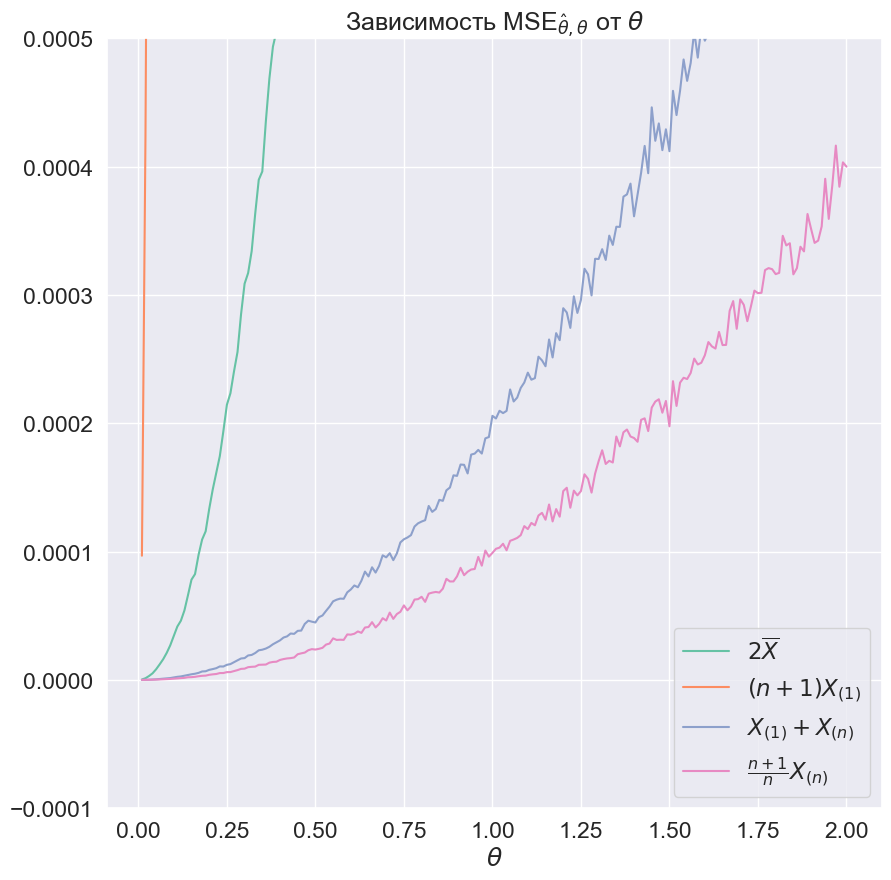

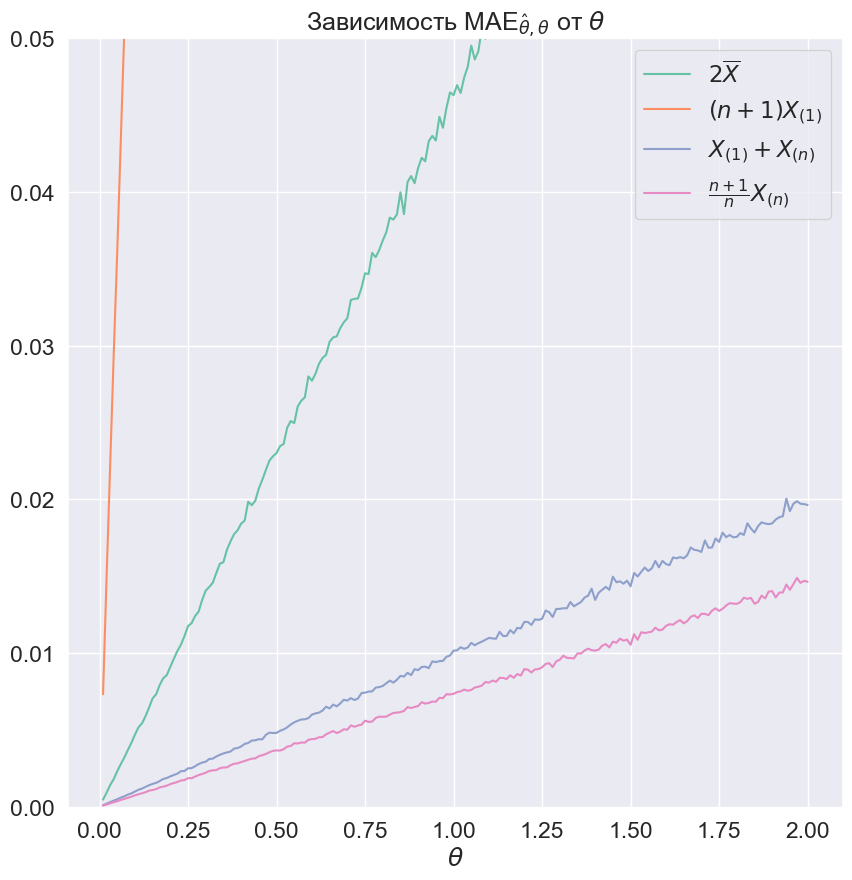

In [20]:
plt.figure(figsize=(10, 10))
plt.plot(theta, risk2_mean, label='$2\overline{X}$')
plt.plot(theta, risk2_min, label='$(n+1)X_{(1)}$')
plt.plot(theta, risk2_minmax, label='$X_{(1)} + X_{(n)}$')
plt.plot(theta, risk2_max, label='$\\frac{n+1}{n}X_{(n)}$')
plt.xlabel('$\\theta$')
plt.title('Зависимость MSE$_{\hat\\theta, \\theta}$ от $\\theta$')
plt.ylim(-0.0001, 0.0005)
plt.legend()

plt.figure(figsize=(10, 10))
plt.plot(theta, risk1_mean, label='$2\overline{X}$')
plt.plot(theta, risk1_min, label='$(n+1)X_{(1)}$')
plt.plot(theta, risk1_minmax, label='$X_{(1)} + X_{(n)}$')
plt.plot(theta, risk1_max, label='$\\frac{n+1}{n}X_{(n)}$')
plt.xlabel('$\\theta$')
plt.title('Зависимость MAE$_{\hat\\theta, \\theta}$ от $\\theta$')
plt.ylim(-0.0001, 0.05)
plt.legend()
plt.show()

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** 
Подходы дали одинаковые результаты.

Лучшая оценка: $\frac{n+1}{n}X_{(n)}$. 

За ней чуть хуже: $X_{(1)} + X_{(n)}$.

Потом $2\overline{X}$ значительно хуже. 

$(n+1)X_{1}$ совсем плохая.

---
###  Задача 3.
Пусть $X = \left( X_1, \dots, X_n \right), n = 9$ &mdash; выборка из распределения $Bern(\theta), \theta \in [0, 1]$. При сравнении оценок будем рассматривать среднеквадратичный риск $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^2$

Известно, что оценка $\overline{X}$  параметра сдвига $\theta$ является наилучшей оценкой в среднеквадратичном подходе среди всех несмещенных оценок.
В минимаксном подходе среди всех оценок наилучшей является оценка Ходжеса-Лемана: $\widetilde{\theta} = \overline{X} + \frac{1}{1 + \sqrt{n}} \left(\frac{1}{2} - \overline{X} \right).$
Сравним точность оценок $\overline{X}$ и $\widetilde{\theta}$.

**1.** Нанесите на один график функции риска $MSE_{\overline{X}} (\theta)$ и $MSE_{\widetilde{\theta}} (\theta)$. Численно посчитайте долю тех $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$. 

**Решение:**

$MSE_{\widetilde{\theta}} (\theta) = \frac{1}{4(1+\sqrt{n})^2}$

$MSE_{\overline{X}} (\theta) = \frac{\theta(1 - \theta)}{n}$

In [22]:
n = 9
theta = np.linspace(0, 1, 1000)

rhl = 1 / 4 / (1 + np.sqrt(n)) ** 2
rxm = theta * (1 - theta) / n

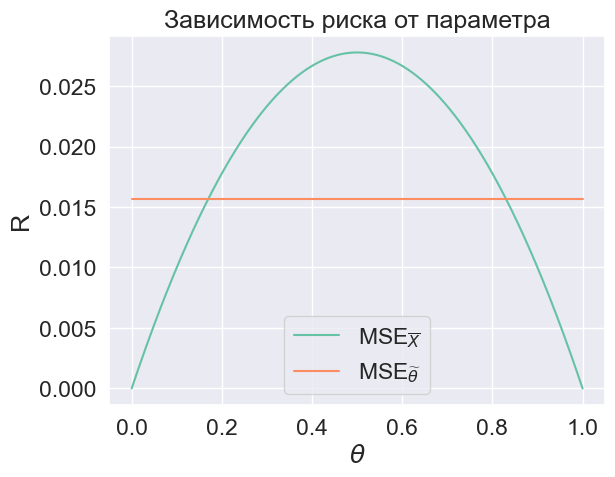

In [23]:
plt.plot(theta, rxm, label='MSE$_{\overline{X}}$')
plt.plot(theta, np.zeros(1000)+rhl, label='MSE$_{\widetilde{\\theta}}$')
plt.xlabel('$\\theta$')
plt.ylabel('R')
plt.title('Зависимость риска от параметра')
plt.legend()
plt.show()

Посчитаем долю $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$:

In [26]:
(rhl < rxm).sum() / theta.shape[0]

0.66

**Ответ:** 
В 66% $\widetilde{\theta}$ лучше чем $\overline{X}$

**2.** Проведите эксперимент. Сгенерируйте параметры $\theta = \left( \theta_1, \dots, \theta_{1000} \right)$ из распределения $U[0, 1]$ независимо, после чего сгенерируйте выборки $X_k = \left( X_{k1}, \dots, X_{kn} \right) \sim Bern(\theta_k), \; 1 \leqslant k \leqslant 1000, \; n=9$.

По каждой из выборок $X_k$ вычислите оценки $\overline{X_k}$ и $\widetilde{\theta}_k$ и определите, какая из них ближе к $\theta_k$. В какой доле случаев оценка Ходжеса-Лемана оказалась лучше? Похож ли результат на ответ в прошлом пункте? Почему?

**Решение:**

In [27]:
theta = sps.uniform(0, 1).rvs(size=1000)
X = sps.bernoulli(theta).rvs(size=(9, 1000))

X_mean = X.mean(axis=0)
X_hl = X.mean(axis=0) + 1 / (1+np.sqrt(n)) * (1/2 - X.mean(axis=0))

(np.abs(X_hl-theta) < np.abs(X_mean-theta)).sum() / X_hl.shape[0]

0.495

**Вывод:** 
Оценка Ходжеса-Лемана оказалась лучше в 49,5% случаев, а не 66%, как было в прошлом пункте. Это объясняется тем, что в этом пункте мы оценивали долю $\theta$ при которых, $MAE_{\widetilde{\theta}} (\theta) < MAE_{\overline{X}} (\theta)$ и, естественно, это не равно доле $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$.

**3.**  Рассмотрим функцию $p(\theta) = \mathsf{P}_{\theta} \left(\left|\widetilde{\theta} - \theta \right| < \left| \overline{X} - \theta \right| \right)$ &mdash; вероятность того, что оценка $\widetilde{\theta}$ оказалась ближе к $\theta$, чем $\overline{X}$. Можно показать, что при $\theta \leqslant 1/2$ верно равенство $p(\theta) = 1 - \mathsf{P}_{\theta} \left( \frac{\theta - d_n}{1-2d_n} \leqslant \overline{X} \leqslant \frac12 \right)$, где $d_n = \frac{1}{4\left(1+\sqrt{n}\right)}$, причем функция $p(\theta)$ симметрична относительно $1/2$. Такую вероятность можно вычислить, используя функцию распределения (`cdf`) биномиального распределения.
Если параметр $\theta$ случаен, то вероятность того, что оценка $\widetilde{\theta}$ окажется ближе к $\theta$, равна $p_* = \int\limits_0^1 p(t) dt$, что соответствует площади под кривой графика функции $p(\theta)$.

Постройте график функции $p(\theta)$. Посчитайте вероятность $p_*$ с помощью метода Монте-Карло. Сделайте выводы.

**Решение:**

In [28]:
n = 9
theta = np.linspace(0, 1, 1000)

dn = 1 / (4 * (1 + np.sqrt(n)))
P = sps.binom(n, theta[:500])

p_half = 1 - (P.cdf(n / 2) - P.cdf(n * (theta[:500] - dn) / (1 - 2 * dn)))

p = np.concatenate([p_half, p_half[::-1]])

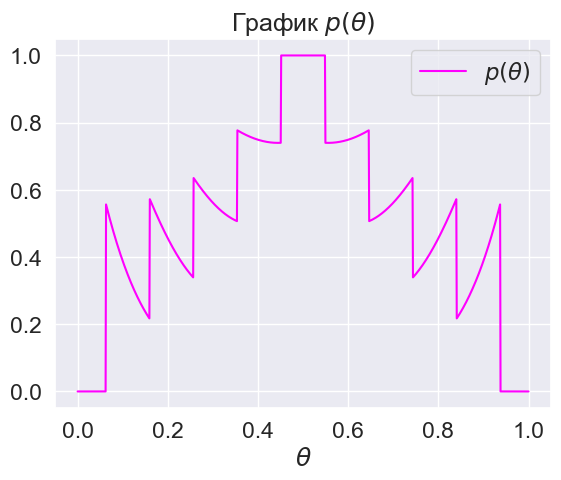

In [35]:
plt.plot(theta, p, label='$p(\\theta)$', color='magenta')
plt.xlabel('$\\theta$')
plt.title('График $p(\\theta)$')
plt.legend()
plt.show()

In [36]:
p_star = p.mean()
p_star

0.508305674926876

**Ответ:** $p_*(\theta) \approx 0.508$

**4.** Исследуйте, как зависит вероятность $p_*$ от размера выборки, постройте график этой зависимости. Сделайте выводы.

**Решение:**

In [52]:
n = np.arange(1, 3001)  
theta = np.linspace(0, 1, 1000)

# Вычисляем dn для каждого значения n
dn = 1 / (4 * (1 + np.sqrt(n[:, np.newaxis])))

P = sps.binom(n[:, np.newaxis], theta[:500])

p_half = 1 - (P.cdf(n[:, np.newaxis] / 2) - P.cdf(n[:, np.newaxis] * (theta[:500] - dn) / (1 - 2 * dn)))

p = np.concatenate([p_half, p_half[:, ::-1]], axis=1)

p_star = p.mean(axis=1)

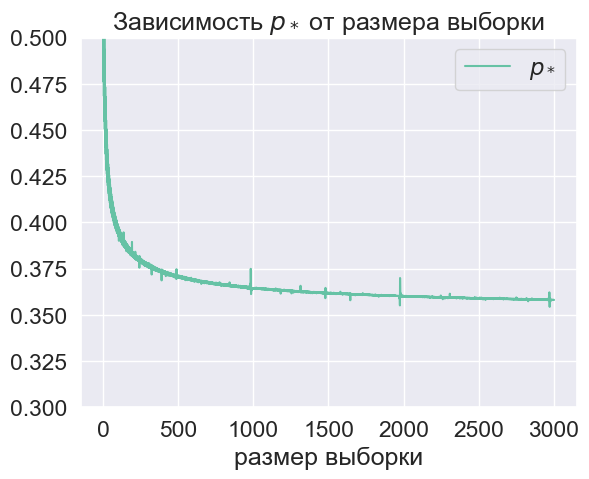

In [54]:
plt.plot(n, p_star, label='$p_*$')
plt.legend()
plt.xlabel('размер выборки')
plt.title('Зависимость $p_*$ от размера выборки')
plt.ylim(0.3, 0.5)
plt.show()

**Ответ:** 
$p_*$ убывает и при очень большом размере выборки стремится к значению 0.36

**Вывод:** 
В задаче провели сравнение двух оценок параметра $\theta$: среднее значение выборки $\overline{X}$ и оценка Ходжеса-Лемана $\widetilde{\theta}$. Среднее $\overline{X}$ является наилучшей несмещенной оценкой в смысле минимизации среднеквадратичной ошибки, в то время как $\widetilde{\theta}$ минимизирует максимальную ошибку и оптимальна в минимаксном подходе.

Результаты показали:
- В 66% случаев среднеквадратичная ошибка ($MSE$) оценки Ходжеса-Лемана $\widetilde{\theta}$ оказывается ниже, чем у среднего значения выборки $\overline{X}$.
- Были также изучены вероятности того, что средняя абсолютная ошибка ($MAE$) оценки $\widetilde{\theta}$ меньше, чем у $\overline{X}$. Анализ графика зависимости этой вероятности от размера выборки показывает, что при больших $n$ вероятность стремится к 0.36, тогда как при малых $n$ вероятность превышает 0.5.